# Installing rdkit

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys 
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import warnings
warnings.filterwarnings('ignore')

--2020-10-25 09:52:33--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   168MB/s    in 0.5s    

2020-10-25 09:52:33 (168 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_

**Importing the dataset**

In [2]:
! wget https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt
! wget https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv

--2020-10-25 09:54:17--  https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt
Resolving pubs.acs.org (pubs.acs.org)... 104.18.1.20, 104.18.0.20
Connecting to pubs.acs.org (pubs.acs.org)|104.18.1.20|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt?cookieSet=1 [following]
--2020-10-25 09:54:18--  https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt?cookieSet=1
Reusing existing connection to pubs.acs.org:443.
HTTP request sent, awaiting response... 302 Found
Location: https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt [following]
--2020-10-25 09:54:18--  https://pubs.acs.org/doi/suppl/10.1021/ci034243x/suppl_file/ci034243xsi20040112_053635.txt
Reusing existing connection to pubs.acs.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 60034 (59K

**Dataset**

In [3]:
import pandas as pd
import numpy as np
data=pd.read_csv('delaney.csv')
data.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl


**Convert the SMILES object to mol object**

In [4]:
from rdkit import Chem
mol_lst=[]
for i in data.SMILES:
    mol=Chem.MolFromSmiles(i)
    mol_lst.append(mol)
len(mol_lst)

1144

# Calculation of Descriptors

In [5]:
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

In [6]:
desc_lst=[i[0] for i in Descriptors._descList]
descriptor=MoleculeDescriptors.MolecularDescriptorCalculator(desc_lst)
descrs = []
for i in range(len(mol_lst)):
    descrs.append(descriptor.CalcDescriptors(mol_lst[i]))

In [7]:
molDes=pd.DataFrame(descrs,columns=desc_lst)
molDes.head(20)

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,5.116512,-1.276235,5.116512,0.039352,0.487138,167.850,165.834,165.891061,38,0,...,0,0,0,0,0,0,0,0,0,0
1,5.060957,-1.083333,5.060957,1.083333,0.445171,133.405,130.381,131.930033,32,0,...,0,0,0,0,0,0,0,0,0,0
2,5.114198,-0.672840,5.114198,0.672840,0.527312,167.850,165.834,165.891061,38,0,...,0,0,0,0,0,0,0,0,0,0
3,5.095679,-0.405864,5.095679,0.308642,0.480258,133.405,130.381,131.930033,32,0,...,0,0,0,0,0,0,0,0,0,0
4,11.544753,-4.226080,11.544753,3.685957,0.553756,187.375,187.375,185.901768,50,0,...,0,0,0,0,0,0,0,0,0,0
5,5.040123,-0.222222,5.040123,0.222222,0.405983,98.960,94.928,97.969005,26,0,...,0,0,0,0,0,0,0,0,0,0
6,4.845679,0.111111,4.845679,0.111111,0.432798,96.944,94.928,95.953355,24,0,...,0,0,0,0,0,0,0,0,0,0
7,5.060000,-0.037037,5.060000,0.037037,0.519424,118.176,104.064,118.099380,50,0,...,0,0,0,0,0,0,0,0,0,0
8,5.634599,0.301698,5.634599,0.301698,0.447415,215.894,213.878,213.891061,54,0,...,0,0,0,0,0,0,0,0,0,0
9,2.258426,1.301759,2.258426,1.301759,0.508630,132.206,120.110,132.093900,52,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print(molDes.shape)
molDes.columns

(1144, 208)


Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'NumRadicalElectrons',
       ...
       'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene',
       'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene',
       'fr_unbrch_alkane', 'fr_urea'],
      dtype='object', length=208)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
molDes.describe().style.background_gradient(cmap = "Reds")

In [10]:
corr_mat = molDes.corr()
corr_mat

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
MaxEStateIndex,1.000000,-0.662381,1.000000,-0.718117,0.397141,0.457216,0.447514,0.459224,0.553286,NaN,...,-0.019716,0.129424,0.059737,-0.010661,NaN,-0.017709,NaN,-0.069493,-0.055226,0.251038
MinEStateIndex,-0.662381,1.000000,-0.662381,0.485463,-0.212473,-0.549351,-0.554714,-0.550129,-0.539821,NaN,...,-0.011961,-0.392667,-0.171287,0.051924,NaN,0.004671,NaN,0.055580,0.103184,-0.156739
MaxAbsEStateIndex,1.000000,-0.662381,1.000000,-0.718117,0.397141,0.457216,0.447514,0.459224,0.553286,NaN,...,-0.019716,0.129424,0.059737,-0.010661,NaN,-0.017709,NaN,-0.069493,-0.055226,0.251038
MinAbsEStateIndex,-0.718117,0.485463,-0.718117,1.000000,-0.370304,-0.363260,-0.357669,-0.363925,-0.405284,NaN,...,-0.017449,-0.106839,-0.045688,0.084465,NaN,0.006551,NaN,0.090906,0.069963,-0.098928
qed,0.397141,-0.212473,0.397141,-0.370304,1.000000,0.249251,0.245907,0.250103,0.268707,NaN,...,0.049438,0.117411,0.097064,-0.023011,NaN,0.040552,NaN,-0.023052,-0.207797,0.154029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_thiazole,-0.017709,0.004671,-0.017709,0.006551,0.040552,-0.007615,-0.003850,-0.007446,-0.015492,NaN,...,-0.013732,0.053577,-0.004648,-0.009044,NaN,1.000000,NaN,-0.003284,-0.016684,0.019542
fr_thiocyan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fr_thiophene,-0.069493,0.055580,-0.069493,0.090906,-0.023052,-0.028733,-0.027017,-0.028707,-0.032813,NaN,...,-0.007324,-0.005406,-0.002479,-0.004824,NaN,-0.003284,NaN,1.000000,-0.008898,-0.011296
fr_unbrch_alkane,-0.055226,0.103184,-0.055226,0.069963,-0.207797,0.020426,-0.008618,0.021062,0.092421,NaN,...,0.010662,-0.023914,-0.012595,0.030468,NaN,-0.016684,NaN,-0.008898,1.000000,-0.043763


# Feature selection

**Removing the highly correlated columns**

In [11]:
corr_feature = []
for i in range(len(corr_mat.columns)):
    for j in range(i):
        if abs(corr_mat.iloc[i,j] > 0.9): #abs is absolute
            corr_feature.append(corr_mat.columns[i])
corr_feature = list(set(corr_feature))
print(corr_feature)
len(corr_feature)

['NOCount', 'SlogP_VSA6', 'fr_halogen', 'Chi4n', 'Chi0n', 'Chi0v', 'HeavyAtomCount', 'fr_nitrile', 'fr_nitro_arom', 'Chi3v', 'NumHAcceptors', 'Chi1', 'Chi4v', 'NumValenceElectrons', 'LabuteASA', 'fr_Nhpyrrole', 'fr_phos_ester', 'MinAbsPartialCharge', 'Chi2v', 'NumAliphaticRings', 'MaxAbsEStateIndex', 'Chi1n', 'Chi2n', 'ExactMolWt', 'fr_C_O_noCOO', 'fr_phenol', 'Chi0', 'NumSaturatedCarbocycles', 'fr_benzene', 'SlogP_VSA5', 'Kappa1', 'VSA_EState6', 'NumHDonors', 'NumSaturatedRings', 'Chi1v', 'NumAromaticCarbocycles', 'Chi3n', 'fr_Al_OH_noTert', 'HeavyAtomMolWt', 'VSA_EState10', 'MolMR', 'fr_phenol_noOrthoHbond']


42

In [12]:
molDes.drop(columns = corr_feature,axis = 1, inplace = True)
print(molDes.shape)
molDes.head(10)

(1144, 166)


,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,FpDensityMorgan1,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,5.116512,-1.276235,0.039352,0.487138,167.850,0,0.203436,-0.122063,0.203436,1.166667,...,0,0,0,0,0,0,0,0,0,0
1,5.060957,-1.083333,1.083333,0.445171,133.405,0,0.187382,-0.084013,0.187382,1.200000,...,0,0,0,0,0,0,0,0,0,0
2,5.114198,-0.672840,0.672840,0.527312,167.850,0,0.137344,-0.102365,0.137344,0.666667,...,0,0,0,0,0,0,0,0,0,0
3,5.095679,-0.405864,0.308642,0.480258,133.405,0,0.120829,-0.123772,0.123772,1.400000,...,0,0,0,0,0,0,0,0,0,0
4,11.544753,-4.226080,3.685957,0.553756,187.375,0,0.382976,-0.199489,0.382976,0.875000,...,0,0,0,0,0,0,0,0,0,0
5,5.040123,-0.222222,0.222222,0.405983,98.960,0,0.104589,-0.105706,0.105706,1.500000,...,0,0,0,0,0,0,0,0,0,0
6,4.845679,0.111111,0.111111,0.432798,96.944,0,0.099184,-0.071555,0.099184,1.500000,...,0,0,0,0,0,0,0,0,0,0
7,5.060000,-0.037037,0.037037,0.519424,118.176,0,0.154255,-0.353262,0.353262,1.125000,...,0,0,0,0,0,0,0,0,0,0
8,5.634599,0.301698,0.301698,0.447415,215.894,0,0.079320,-0.082654,0.082654,0.700000,...,0,0,0,0,0,0,0,0,0,0
9,2.258426,1.301759,1.301759,0.508630,132.206,0,-0.027603,-0.061974,0.061974,0.800000,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import ExtraTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

**Using ExtraTreeRegressor to find the best features**

In [14]:
x=molDes
y=data['measured log(solubility:mol/L)'] #Target
model = ExtraTreeRegressor()
model.fit(x,y)

ExtraTreeRegressor()

In [15]:
feat_importances = pd.Series(model.feature_importances_, index = x.columns)
feat_importances=feat_importances.sort_values(ascending=False)
Imp_features=feat_importances.head(20)
print(type(Imp_features))
Imp_features

<class 'pandas.core.series.Series'>


PEOE_VSA6           0.371173
MolLogP             0.133047
Kappa2              0.089953
MinPartialCharge    0.057468
BertzCT             0.045021
PEOE_VSA7           0.037839
qed                 0.036166
BCUT2D_LOGPHI       0.035878
BCUT2D_CHGLO        0.016701
MolWt               0.014501
RingCount           0.014193
MaxEStateIndex      0.008792
fr_Al_OH            0.007478
SlogP_VSA8          0.006983
SMR_VSA10           0.006646
PEOE_VSA3           0.006133
BalabanJ            0.005829
EState_VSA10        0.004706
MaxPartialCharge    0.003870
FpDensityMorgan2    0.003649
dtype: float64

**From this we can see that the MolLogP is the best feature**

In [16]:
molDes_feat = pd.DataFrame(Imp_features)
molDes_feat.index

Index(['PEOE_VSA6', 'MolLogP', 'Kappa2', 'MinPartialCharge', 'BertzCT',
       'PEOE_VSA7', 'qed', 'BCUT2D_LOGPHI', 'BCUT2D_CHGLO', 'MolWt',
       'RingCount', 'MaxEStateIndex', 'fr_Al_OH', 'SlogP_VSA8', 'SMR_VSA10',
       'PEOE_VSA3', 'BalabanJ', 'EState_VSA10', 'MaxPartialCharge',
       'FpDensityMorgan2'],
      dtype='object')

In [17]:
mol_feat = molDes[['MolLogP', 'Kappa2', 'PEOE_VSA6', 'MinPartialCharge',
       'NumAromaticRings', 'fr_bicyclic', 'BCUT2D_MRLOW', 'MolWt',
       'SlogP_VSA4', 'SMR_VSA10', 'FractionCSP3', 'EState_VSA5', 'fr_Al_OH',
       'EState_VSA8', 'BertzCT', 'Ipc', 'FpDensityMorgan1', 'SMR_VSA7',
       'BCUT2D_LOGPLOW', 'SlogP_VSA2']]

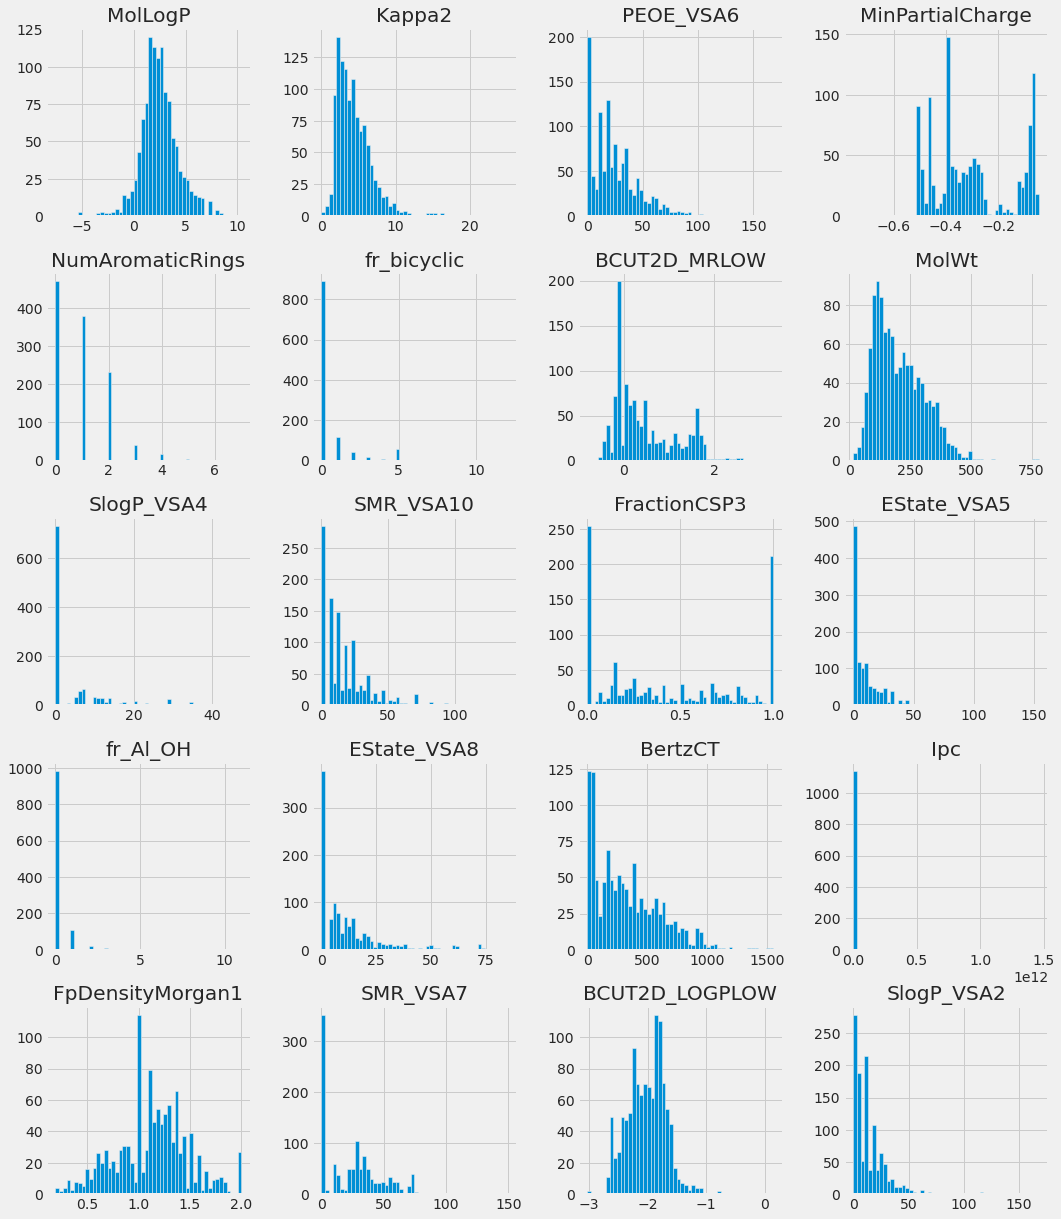

In [18]:
#Plotting the distribution of the features.
mol_feat.hist(bins=50,figsize=(16, 20));

**Plotting the features, with respect to the target value**

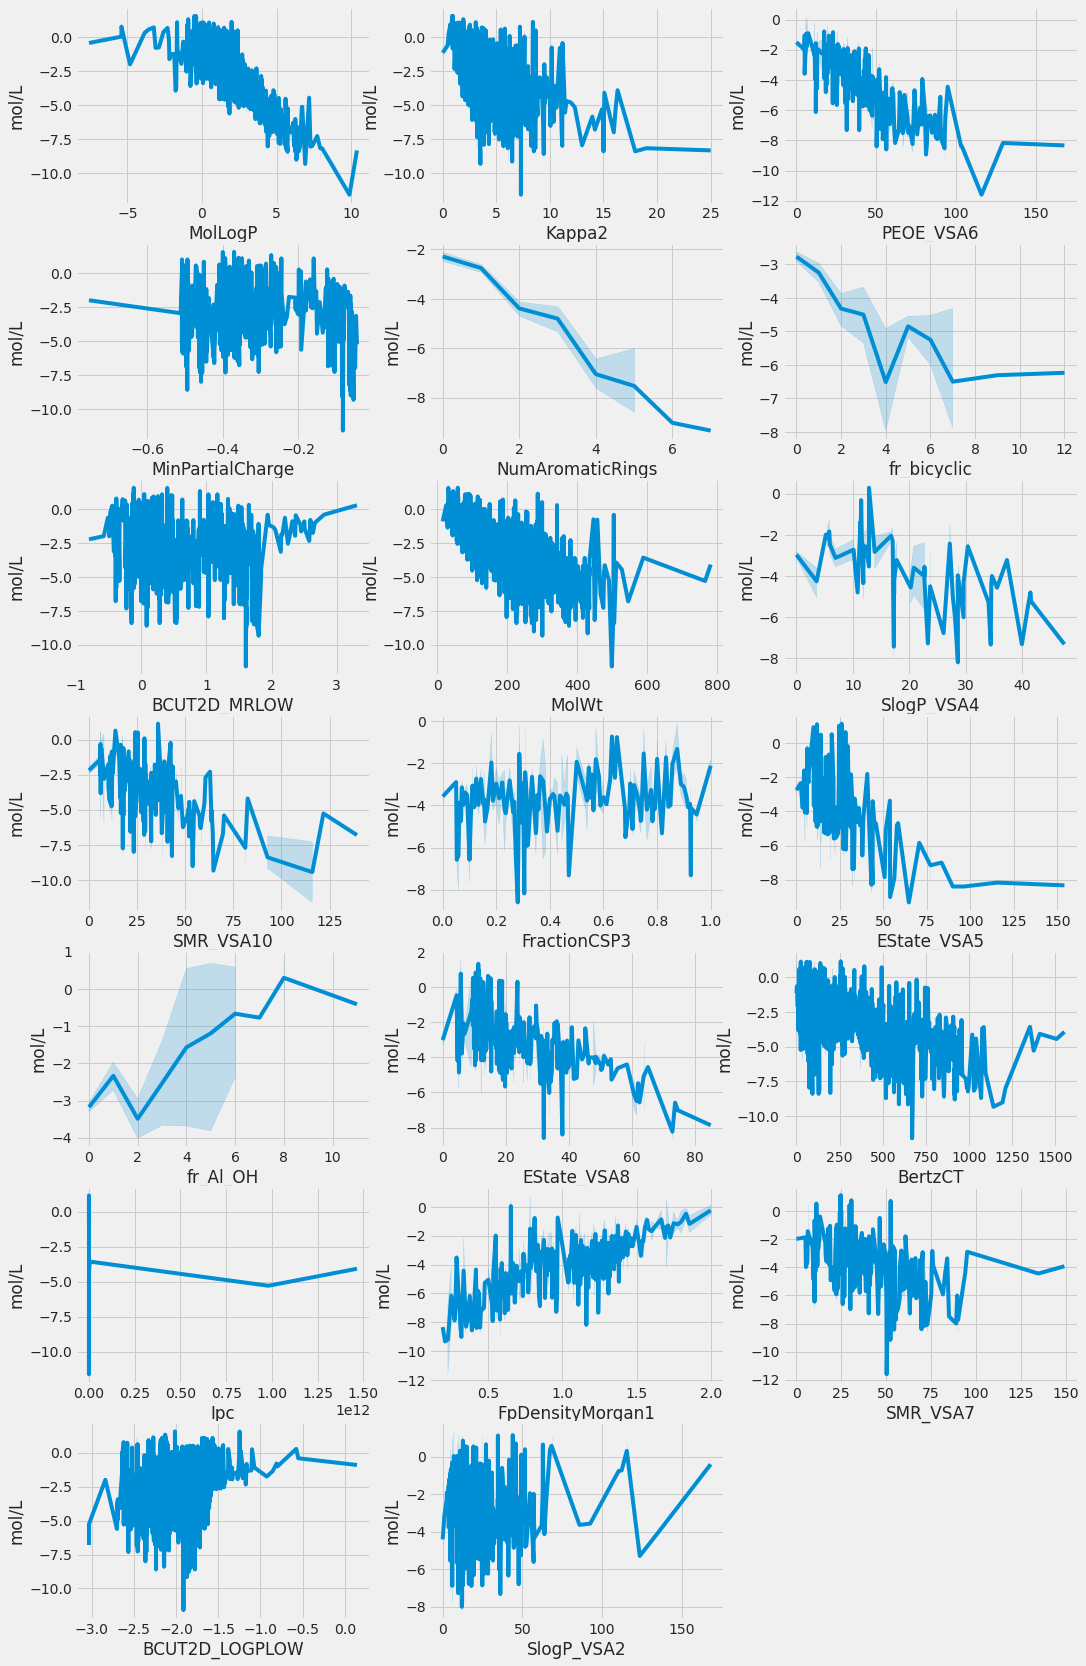

In [19]:
plt.figure(figsize=(16,60))
i=1
target=data['measured log(solubility:mol/L)']
for feature in mol_feat:
    plt.subplot(15,3,i)
    sns.lineplot(x=mol_feat[feature],y=target)
    plt.xlabel(feature)
    plt.ylabel('mol/L')
    i+=1

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
lin_reg=LinearRegression()
X=mol_feat
Y=data['measured log(solubility:mol/L)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [21]:
linear=lin_reg.fit(X_train,Y_train)
print("Training score: {} \nValidation score: {} ".format(round(linear.score(X_train, Y_train),3),round(linear.score(X_test,Y_test),3)))

Training score: 0.853 
Validation score: 0.849 


**Hyperparameter Tuning of the linear regression model**

In [22]:
from sklearn.model_selection import GridSearchCV
GridSearchCV.get_params(LinearRegression)

{'copy_X': None, 'fit_intercept': None, 'n_jobs': None, 'normalize': None}

**This is the best fit for the model**

In [23]:
lin_params={'fit_intercept':[True],'normalize':[True]}
lin=GridSearchCV(LinearRegression(),param_grid=lin_params).fit(X_train, Y_train).best_estimator_
linear_regression=lin.fit(X_train,Y_train)
print("Training score: {} \nValidation score: {} ".format(round(linear_regression.score(X_train, Y_train),3),round(linear_regression.score(X_test,Y_test),3)))

Training score: 0.853 
Validation score: 0.849 


In [24]:
Y_lin_pred_train = linear_regression.predict(X_train)
Y_lin_pred_test=linear_regression.predict(X_test)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_lin_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_lin_pred_test))

Mean squared error (MSE): 0.67
Coefficient of determination (R^2): 0.85


# Logistic Regression

**Logistic Regression can be used only when the dependent (Target) variable is of binary form ( 0 or 1)**

In [25]:
#Converting the target variable into binary form
lst = []
for i in data['measured log(solubility:mol/L)']:
    #print(i)
    if i>0:
        lst.append(1)
    else:
        lst.append(0)
data['sol_class']=lst

***Logistic Regression Model***

In [26]:
#Using logistic Regression
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
log_reg=linear_model.LogisticRegression()
X=mol_feat
Y=data['sol_class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
log_reg=log_reg.fit(X_train,Y_train)
print("Training score: {} \nValidation score: {} ".format(round(log_reg.score(X_train, Y_train),3),round(log_reg.score(X_test,Y_test),3)))

Training score: 0.949 
Validation score: 0.956 


**Since the score is too good, no need for parameter tuning**

In [27]:
y_log_pred=log_reg.predict(X_test)
print(classification_report(Y_test,y_log_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       212
           1       1.00      0.41      0.58        17

    accuracy                           0.96       229
   macro avg       0.98      0.71      0.78       229
weighted avg       0.96      0.96      0.95       229



In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_log_pred)
print(cm)

[[212   0]
 [ 10   7]]


# Ridge Regression

In [29]:
from sklearn.linear_model import RidgeCV, Ridge
X=mol_feat
Y=data['measured log(solubility:mol/L)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [30]:
r = RidgeCV(alphas=[0.01,1.0,5.0,10.0],normalize=True,cv=5)
ridge=r.fit(X_train,Y_train)
ridge.score(X_train,Y_train)

0.44051355580266105

**Parameter Tuning using GridSearchCV**

In [31]:
from sklearn.model_selection import GridSearchCV
ridge_params = {'alpha':[0.01,0.02],'normalize':[True,False],'solver':['auto']}
r_cv=GridSearchCV(Ridge(),param_grid=ridge_params,cv=5).fit(X_train, Y_train).best_estimator_
r_cv.fit(X_train,Y_train)


Ridge(alpha=0.02, normalize=True)

**Model Scores**

In [32]:
print("Training score: {} \nValidation score: {} ".format(round(r_cv.score(X_train, Y_train),3),round(r_cv.score(X_test,Y_test),3)))

Training score: 0.862 
Validation score: 0.815 


In [33]:
y_pred_ridge=r_cv.predict(X_test)
print("The r2_score and the mse are {} and {} respectively".format(round(r2_score(Y_test, y_pred_ridge),3),round(mean_squared_error(Y_test,y_pred_ridge),3)))

The r2_score and the mse are 0.815 and 0.9 respectively


# Lasso Regression

In [34]:
from sklearn.linear_model import Lasso
X=mol_feat
Y=data['measured log(solubility:mol/L)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
lasso_params={'alpha':[0,0.005,0.01],'positive':[True,False],'fit_intercept':[True]}
lasso=GridSearchCV(Lasso(),param_grid=lasso_params).fit(X_train, Y_train).best_estimator_
lasso.fit(X_train,Y_train)


Lasso(alpha=0)

In [35]:
print("Training score: {} \nValidation score: {} ".format(round(lasso.score(X_train, Y_train),3),round(lasso.score(X_test,Y_test),3)))

Training score: 0.855 
Validation score: 0.851 


In [36]:
y_pred_lasso=lasso.predict(X_test)
print("The r2_score and the mse are {} and {} respectively".format(round(r2_score(Y_test, y_pred_lasso),3),
                                                                   round(mean_squared_error(Y_test,y_pred_lasso),3)))

The r2_score and the mse are 0.851 and 0.703 respectively


# Random Forest Regression

In [37]:
from sklearn.ensemble import RandomForestRegressor
X=mol_feat
Y=data['measured log(solubility:mol/L)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


**Random Forest Model Tuning Using GridSearchCV**

In [38]:
X=mol_feat
Y=data['measured log(solubility:mol/L)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
rf_params={'n_estimators':[105,110,115,120],'max_depth':[30,35,40],'max_features':['auto', 'sqrt', 'log2'],'oob_score':[True]}
rf=GridSearchCV(RandomForestRegressor(),param_grid=rf_params).fit(X_train, Y_train).best_estimator_
rf=rf.fit(X_train,Y_train)


In [39]:
print("Training score: {} \nValidation score: {} ".format(round(rf.score(X_train, Y_train),3),round(rf.score(X_test,Y_test),3)))

Training score: 0.987 
Validation score: 0.89 


In [40]:
y_pred_rf=rf.predict(X_test)
print("The r2_score and the mse are {} and {} respectively".format(round(r2_score(Y_test, y_pred_rf),3),round(mean_squared_error(Y_test,y_pred_rf),3)))

The r2_score and the mse are 0.89 and 0.493 respectively


From the above regression models, logistic regression has the best model score, but it can tell only whether the molecule is
soluble or not (assuming that the molecules are soluble, if they have positive mol/L and are insoluble if they are negative).
But for prediction of the solubility, the best model is given by the random forest regressor which had good model score and optimal r2 and mse scores.

**Kindly upvote if you find this notebook helpful**